# Red Neuronal CNN 
Universidad del Valle de Guatemala
Pablo Gonzalez 20362
Javier Mombiela 20067

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import os
from matplotlib.image import imread
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

### Carga de datos

In [59]:
directorio = './data'
os.listdir(directorio)

['entrenamiento.p', 'prueba.p', 'validacion.p']

Con respecto a la división del conjunto de entrenamiento, prueba y validación se puede mencionar que estos ya se proporcionaron divididos por lo que solo se cargarán en 3 estructuras de datos diferentes

In [60]:
ruta_entrenamiento = directorio + '/entrenamiento.p'
ruta_test = directorio + '/prueba.p'
ruta_validacion = directorio + '/validacion.p'

In [61]:
test_data = pd.read_pickle(ruta_test)
validation_data = pd.read_pickle(ruta_validacion)
train_data = pd.read_pickle(ruta_entrenamiento)

Print para visualizar como viene la data estructurada

In [62]:
print(test_data)

{'sizes': array([[53, 54],
       [42, 45],
       [48, 52],
       ...,
       [29, 29],
       [48, 49],
       [32, 31]], dtype=uint8), 'coords': array([[ 6,  5, 48, 49],
       [ 5,  5, 36, 40],
       [ 6,  6, 43, 47],
       ...,
       [ 6,  6, 24, 24],
       [ 5,  6, 43, 44],
       [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
         [116, 137, 171],
         [118, 138, 172],
         ...,
         [ 98, 114, 143],
         [ 97, 121, 147],
         [ 85, 105, 130]],

        [[115, 142, 176],
         [115, 140, 174],
         [117, 141, 175],
         ...,
         [119, 143, 176],
         [120, 141, 173],
         [120, 139, 171]],

        [[117, 141, 174],
         [117, 142, 175],
         [114, 140, 172],
         ...,
         [120, 144, 179],
         [122, 144, 179],
         [120, 143, 177]],

        ...,

        [[117, 137, 167],
         [115, 134, 164],
         [117, 135, 164],
         ...,
         [115, 137, 169],
         [116,

Como se puede visualizar la data cuenta con varias secciones como lo es sizes, coords, features & labels, la que nos interesa en este laboratorio son las features y las labels, las features son las imágenes yb las labels es la clasificación que tiene la imagen ya sea una imagen con límite de velocidad de 20km/h, límite de velocidad de 30 km/h entre otras


### Imagenes de entrenamiento, prueba y validación

In [63]:
train_images = train_data['features']
test_images = test_data['features']
valid_images = validation_data['features']

labels_train = train_data['labels']
labels_test = test_data['labels']
labels_validation = validation_data['labels']

Cantidad de etiquetas en el dataset

In [64]:
num_unique_labels = len(set(labels_train))
print("Número de etiquetas únicas:", num_unique_labels)

num_unique_labels2 = len(set(labels_test))
print("Número de etiquetas únicas:", num_unique_labels2)

num_unique_labels3 = len(set(labels_validation))
print("Número de etiquetas únicas:", num_unique_labels3)

Número de etiquetas únicas: 43
Número de etiquetas únicas: 43
Número de etiquetas únicas: 43


Forma de los datos

In [65]:
labels_train.shape

(34799,)

In [66]:
train_images.shape

(34799, 32, 32, 3)

In [67]:
test_images.shape

(12630, 32, 32, 3)

In [68]:
valid_images.shape

(4410, 32, 32, 3)

Visualización de imagen para corroborar su formato

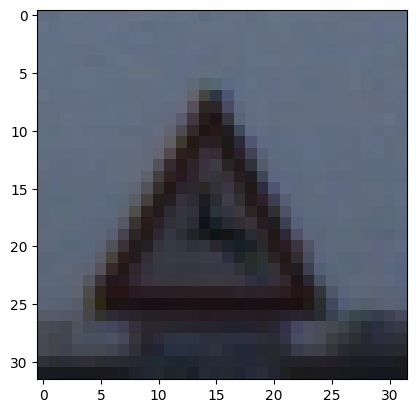

In [69]:
img_para = train_images[600]
plt.imshow(img_para)

In [70]:
img_para.shape

(32, 32, 3)

Como se puede visualizar el shape de la imagen es un shape el cual es óptimo para su trabajo de clasificación por lo que no se hará un resize de las imágenes.

In [71]:
forma_imagen = (32, 32, 3)

In [72]:
# Preprocesamiento de datos
train_images = np.array(train_images)
test_images = np.array(test_images)
valid_images = np.array(valid_images)

Se convierten las listas a numpy array para su mejor manejo en el procesamiento de datos

In [73]:
train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

# Convertir etiquetas a one-hot encoding
num_classes = len(set(labels_train))
labels_train = to_categorical(labels_train, num_classes)
labels_test = to_categorical(labels_test, num_classes)
labels_validation = to_categorical(labels_validation, num_classes)


print(num_classes)
print(labels_train.shape)
print(labels_test.shape)
print(labels_validation.shape)

43
(34799, 43)
(12630, 43)
(4410, 43)


El primer paso es normalizar los valores de los pixeles en un rango de [0,1] esto se realiza ya que así los pixeles están en una escala más manejable para el procesamiento de entrenamiento, se puede mencionar que las redes neuronales son sensibles a la escala de los datos y trabajar con valores más pequeños puede ayudar a la estabilidad y convergencia del modelo.

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Modelo CNN

In [97]:
modelo = Sequential()

modelo.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = forma_imagen, activation = 'relu',))
modelo.add(MaxPooling2D(pool_size = (2, 2)))

modelo.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = forma_imagen , activation = 'relu',))
modelo.add(MaxPooling2D(pool_size = (2, 2)))

modelo.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = forma_imagen, activation = 'relu',))
modelo.add(MaxPooling2D(pool_size = (2, 2)))


modelo.add(Flatten())


modelo.add(Dense(128))
modelo.add(Activation('relu'))

# Dropouts ayudan a reducir el sobre ajuste al ir "apagando" unidades al azar durante el entrenamiento.
# Aquí estamos indicando que al azar apague el 50% de las unidades.
modelo.add(Dropout(0.5))


modelo.add(Dense(num_classes, activation = 'softmax'))
modelo.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### Explicación de arquitectura Le-net


La arquitectura de la red neuronal esta descrita de la siguiente manera:

1. Capas Convolucionales (Conv2D): Las capas convolucionales son responsables de extraer características importantes de la imagen de entrada. Cada capa convolucional aplica varios filtros (núcleos) a la imagen de entrada para detectar patrones y características específicas.
2. Capas de Pooling (MaxPooling2D): Después de cada capa convolucional, se aplica una capa de pooling para reducir la dimensionalidad y la cantidad de parámetros de la red. El max pooling toma el valor máximo de un área de píxeles y lo reduce a uno solo. Esto ayuda a conservar las características más importantes y reducir el cálculo.
3. Capa Flatten: Después de aplicar las capas convolucionales y de pooling, la capa Flatten se utiliza para aplanar la salida en un vector unidimensional. Esto es necesario para conectar las capas completamente conectadas (fully connected) que vienen a continuación.
4. Capas Densas (Fully Connected): Las capas densas son responsables de la clasificación final. Estas capas toman las características extraídas por las capas convolucionales y las procesan para producir la salida final. En el modelo implementado se tiene una capa de 128 neuornas y funcion de activacion relu, seguida de una capa dropout para reducir el sobnreajuste.
5. Capa de Salida (Densa): La última capa es la capa de salida, que tiene un número de neuronas igual al número de clases que se presentan que en este caso son 43, se puede mencionar que se utiliza un softmax de activacion debido a que se cuentan con varias clases y esta funcion ayuda en diferencias dichas clases.

### Importancia de la Función de Pérdida y el Optimizador 

1. Función de Pérdida: La función de pérdida es una medida que indica qué tan bien se están prediciendo las etiquetas reales en comparación con las predicciones de la red. En este caso, se esta utilizando la función de pérdida 'categorical_crossentropy', que es apropiada para problemas de clasificación multiclase. 
2. Optimizador: El optimizador es el algoritmo que ajusta los pesos de la red en función de la información proporcionada por la función de pérdida. En este modelo, se esta utilizando el optimizador 'adam', que es una versión mejorada del descenso de gradiente estocástico. 'adam' ajusta automáticamente la tasa de aprendizaje a medida que avanza el entrenamiento y realiza actualizaciones más eficientes de los pesos de la red.

En conjunto, la función de pérdida y el optimizador trabajan juntos para guiar el proceso de aprendizaje de la red. La red ajusta sus pesos iterativamente en función de cómo se comparan las predicciones con las etiquetas reales, y el optimizador se asegura de que este proceso sea eficiente y efectivo para alcanzar una solución óptima.

### Resumen del modelo

In [98]:
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 64)        

### Diseño de la red Le-Net

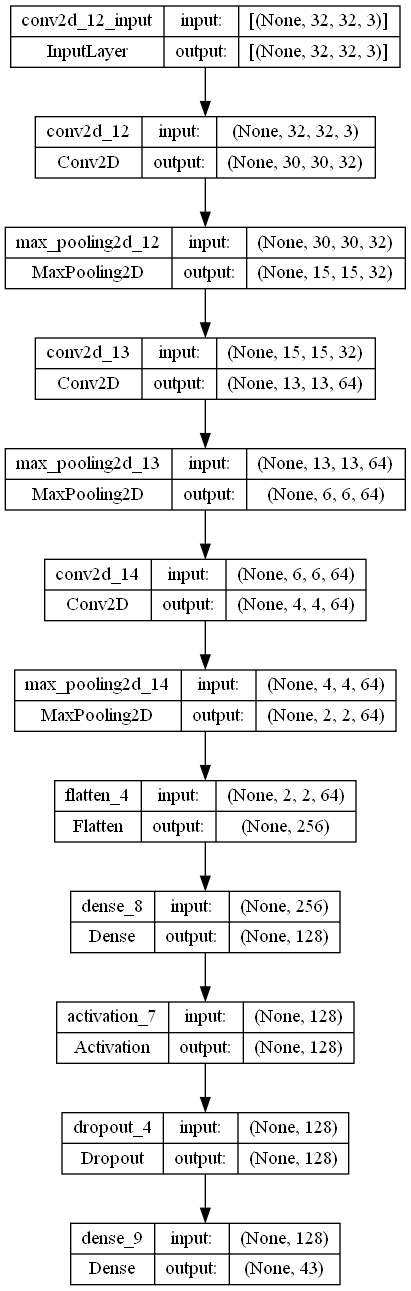

In [99]:
from tensorflow.keras.utils import plot_model
plot_model(modelo, to_file = 'grafica_modelo.png', show_shapes = True, show_layer_names = True)

### Proceso de entrenamiento del modelo

In [100]:
modelo.fit(train_images, labels_train, epochs=20, batch_size=100, validation_data=(valid_images, labels_validation))

Epoch 1/20
348/348 [==============================] - 14s 37ms/step - loss: 2.4539 - accuracy: 0.3280 - val_loss: 1.2588 - val_accuracy: 0.6304
Epoch 2/20
348/348 [==============================] - 12s 35ms/step - loss: 0.8410 - accuracy: 0.7441 - val_loss: 0.5425 - val_accuracy: 0.8481
Epoch 3/20
348/348 [==============================] - 12s 36ms/step - loss: 0.4296 - accuracy: 0.8697 - val_loss: 0.4048 - val_accuracy: 0.8830
Epoch 4/20
348/348 [==============================] - 13s 37ms/step - loss: 0.2802 - accuracy: 0.9165 - val_loss: 0.2904 - val_accuracy: 0.9195
Epoch 5/20
348/348 [==============================] - 13s 37ms/step - loss: 0.1892 - accuracy: 0.9436 - val_loss: 0.2281 - val_accuracy: 0.9370
Epoch 6/20
348/348 [==============================] - 13s 37ms/step - loss: 0.1568 - accuracy: 0.9533 - val_loss: 0.2008 - val_accuracy: 0.9488
Epoch 7/20
348/348 [==============================] - 13s 37ms/step - loss: 0.1214 - accuracy: 0.9646 - val_loss: 0.1715 - val_accuracy:

Durante el proceso de entrenamiento:
1. La red toma un lote de imágenes (batch_size) y sus etiquetas (labels_train) del conjunto de entrenamiento.
2. Calcula las predicciones para las imágenes del lote utilizando los pesos actuales de la red.
3. Calcula el valor de la función de pérdida entre las predicciones y las etiquetas reales.
4. Utiliza el optimizador (en este caso, 'adam') para ajustar los pesos de la red para reducir la pérdida.
5. Repite estos pasos para cada lote de imágenes en el conjunto de entrenamiento durante las 20 épocas especificadas.

Después de cada época, la red evalúa su rendimiento utilizando los datos de validación (valid_images y labels_validation). Esto te dará una idea de cómo está generalizando la red a nuevos datos y si está mejorando a medida que avanza el entrenamient

### Evaluacion del modelo

In [101]:
loss, accuracy = modelo.evaluate(test_images, labels_test, batch_size=100)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

127/127 [==============================] - 1s 9ms/step - loss: 0.2747 - accuracy: 0.9547
Pérdida en el conjunto de prueba: 0.2747
Precisión en el conjunto de prueba: 0.9547


In [102]:
predictions = modelo.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

395/395 [==============================] - 2s 4ms/step


In [103]:
# Obtener la matriz de confusión
confusion = confusion_matrix(np.argmax(labels_test, axis=1), predicted_labels)
print("Matriz de confusion")
print(confusion)

Matriz de confusion
[[ 58   0   0 ...   0   0   0]
 [  3 707   2 ...   0   0   0]
 [  0  10 717 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  54   0]
 [  0   0   0 ...   0   3  87]]


In [104]:
classification_rep = classification_report(np.argmax(labels_test, axis=1), predicted_labels)
print("Informe de classificacion")
print(classification_rep)

Informe de classificacion
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.97      0.98      0.98       720
           2       0.97      0.96      0.96       750
           3       0.87      0.99      0.93       450
           4       0.99      0.97      0.98       660
           5       0.96      0.93      0.94       630
           6       1.00      0.77      0.87       150
           7       0.99      0.92      0.95       450
           8       0.95      0.98      0.96       450
           9       0.97      0.99      0.98       480
          10       0.99      0.98      0.99       660
          11       0.89      0.98      0.93       420
          12       0.98      0.98      0.98       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.89      1.00      0.94       210
          16       0.97      0.99      0.98       150
 